<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [28]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [29]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [30]:
netflix_df['duration'].nunique()

193

In [31]:
# Filter the DataFrame to only include rows where the type is 'Movie'
movies_df = netflix_df[netflix_df['type'] == 'Movie']
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [32]:
duration_counts = movies_df['duration'].value_counts().reset_index()
duration_counts.columns = ['duration', 'total_no_of_movies']
# Display the counts
duration_counts

,duration,total_no_of_movies
0,93,121
1,94,119
2,90,114
3,95,111
4,97,107
...,...,...
181,200,1
182,196,1
183,214,1
184,193,1


### MOST FREQUENT DURATION MOVIE COUNT

In [33]:
#the most frequent movie duration in the 1990s
durations=duration_counts.iloc[0:6,:]
durations

,duration,total_no_of_movies
0,93,121
1,94,119
2,90,114
3,95,111
4,97,107
5,91,105


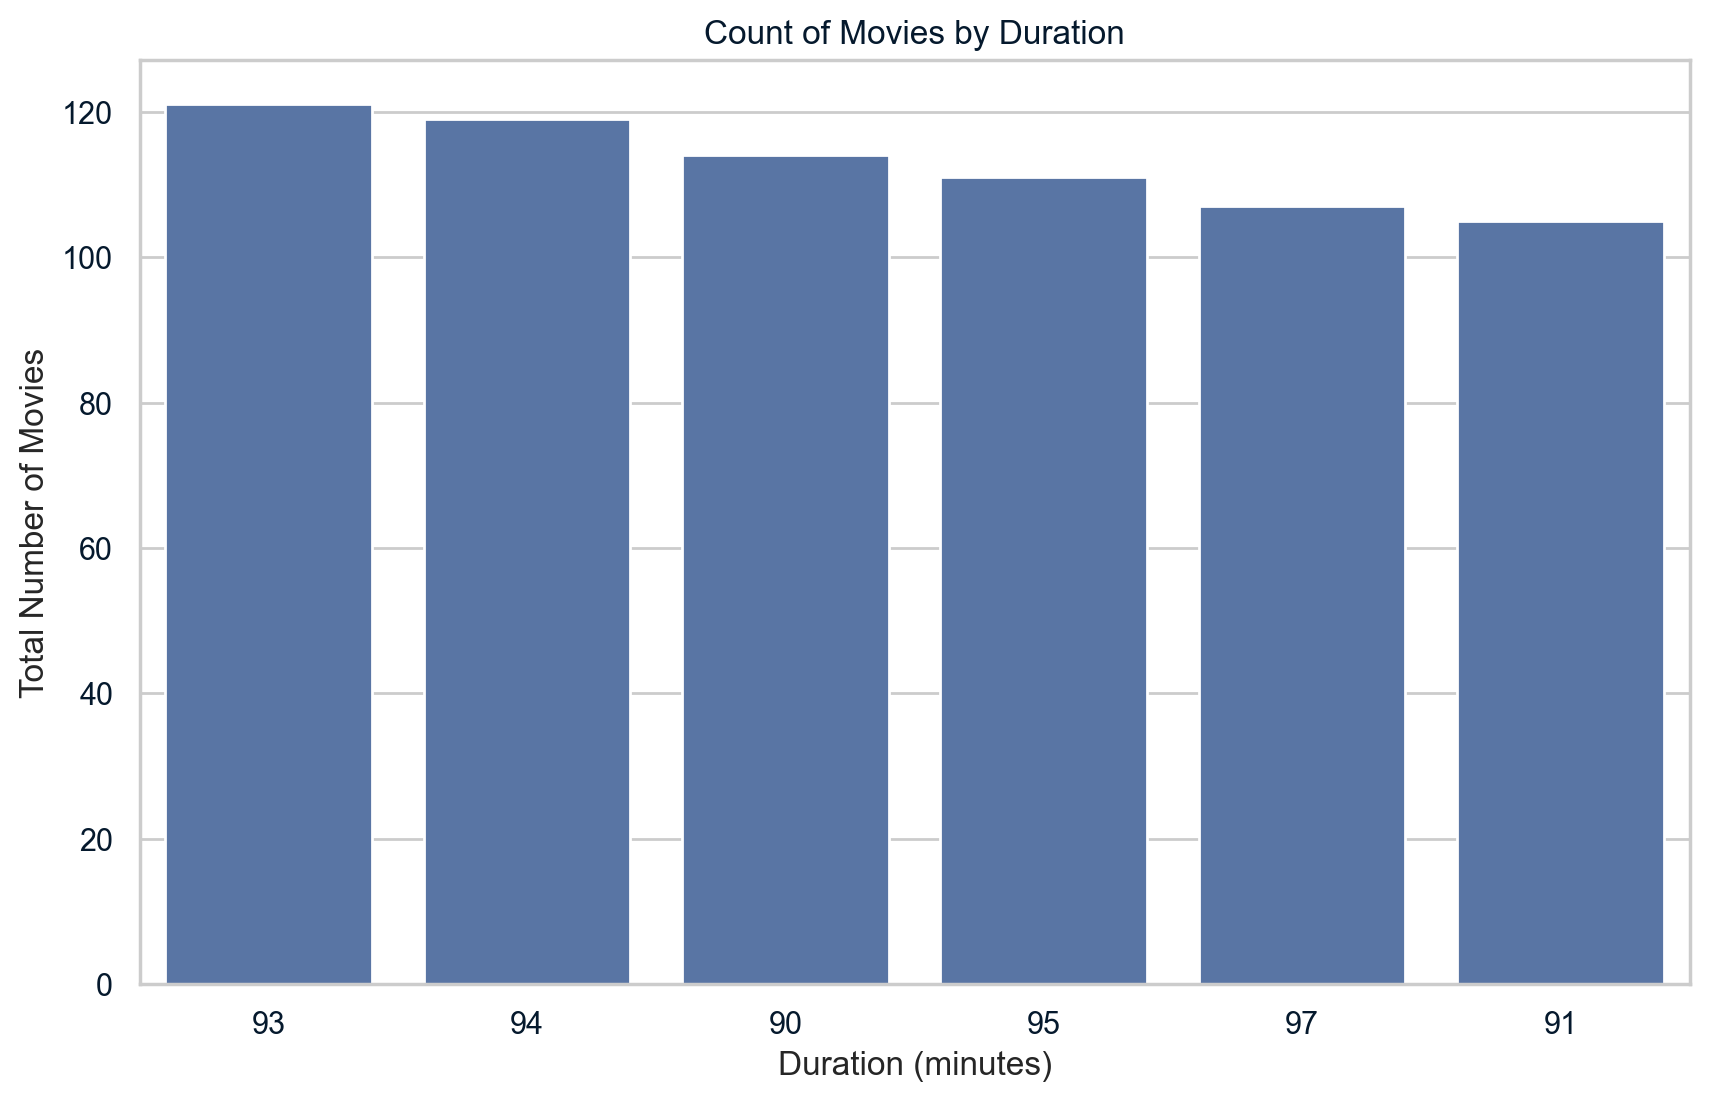

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
duration_sorted=durations.sort_values(by='total_no_of_movies',ascending=False)
duration_sorted
# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='duration', y='total_no_of_movies',
data=duration_sorted, 
order=duration_sorted['duration'])

# Add title and labels
plt.title('Count of Movies by Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Total Number of Movies')

# Show the plot
plt.show()

In [35]:
# Get the duration with the most movies
duration = duration_sorted.iloc[0, 0]
duration = int(duration)
duration

93

## SHORT ACTION MOVIES in 1900s

In [36]:
# Filter the DataFrame to only include rows where the type is 'Movie', genre is 'Action', and release year is in the 1990s
action_movies_df = netflix_df[(netflix_df['type'] == 'Movie') & 
                       (netflix_df['genre'] == 'Action') & 
                       (netflix_df['release_year'].between(1990,1999))]
action_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
352,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,"May 11, 2020",1994,160,Broke and with no concrete plans for the futur...,Action
431,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,"December 1, 2019",1999,95,When diabolical genius Dr. Evil travels back i...,Action
468,s688,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky...",United States,"October 1, 2019",1995,119,"In this fast-paced actioner, two Miami narcoti...",Action
515,s757,Movie,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",India,"April 1, 2018",1995,166,A naïve young man and a rich city girl fall in...,Action
675,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...",Germany,"January 1, 2021",1999,94,A jewel thief returns to his hiding place afte...,Action


In [37]:
short_movies = action_movies_df[action_movies_df['duration']<90]
short_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
1698,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
2993,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
3297,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action


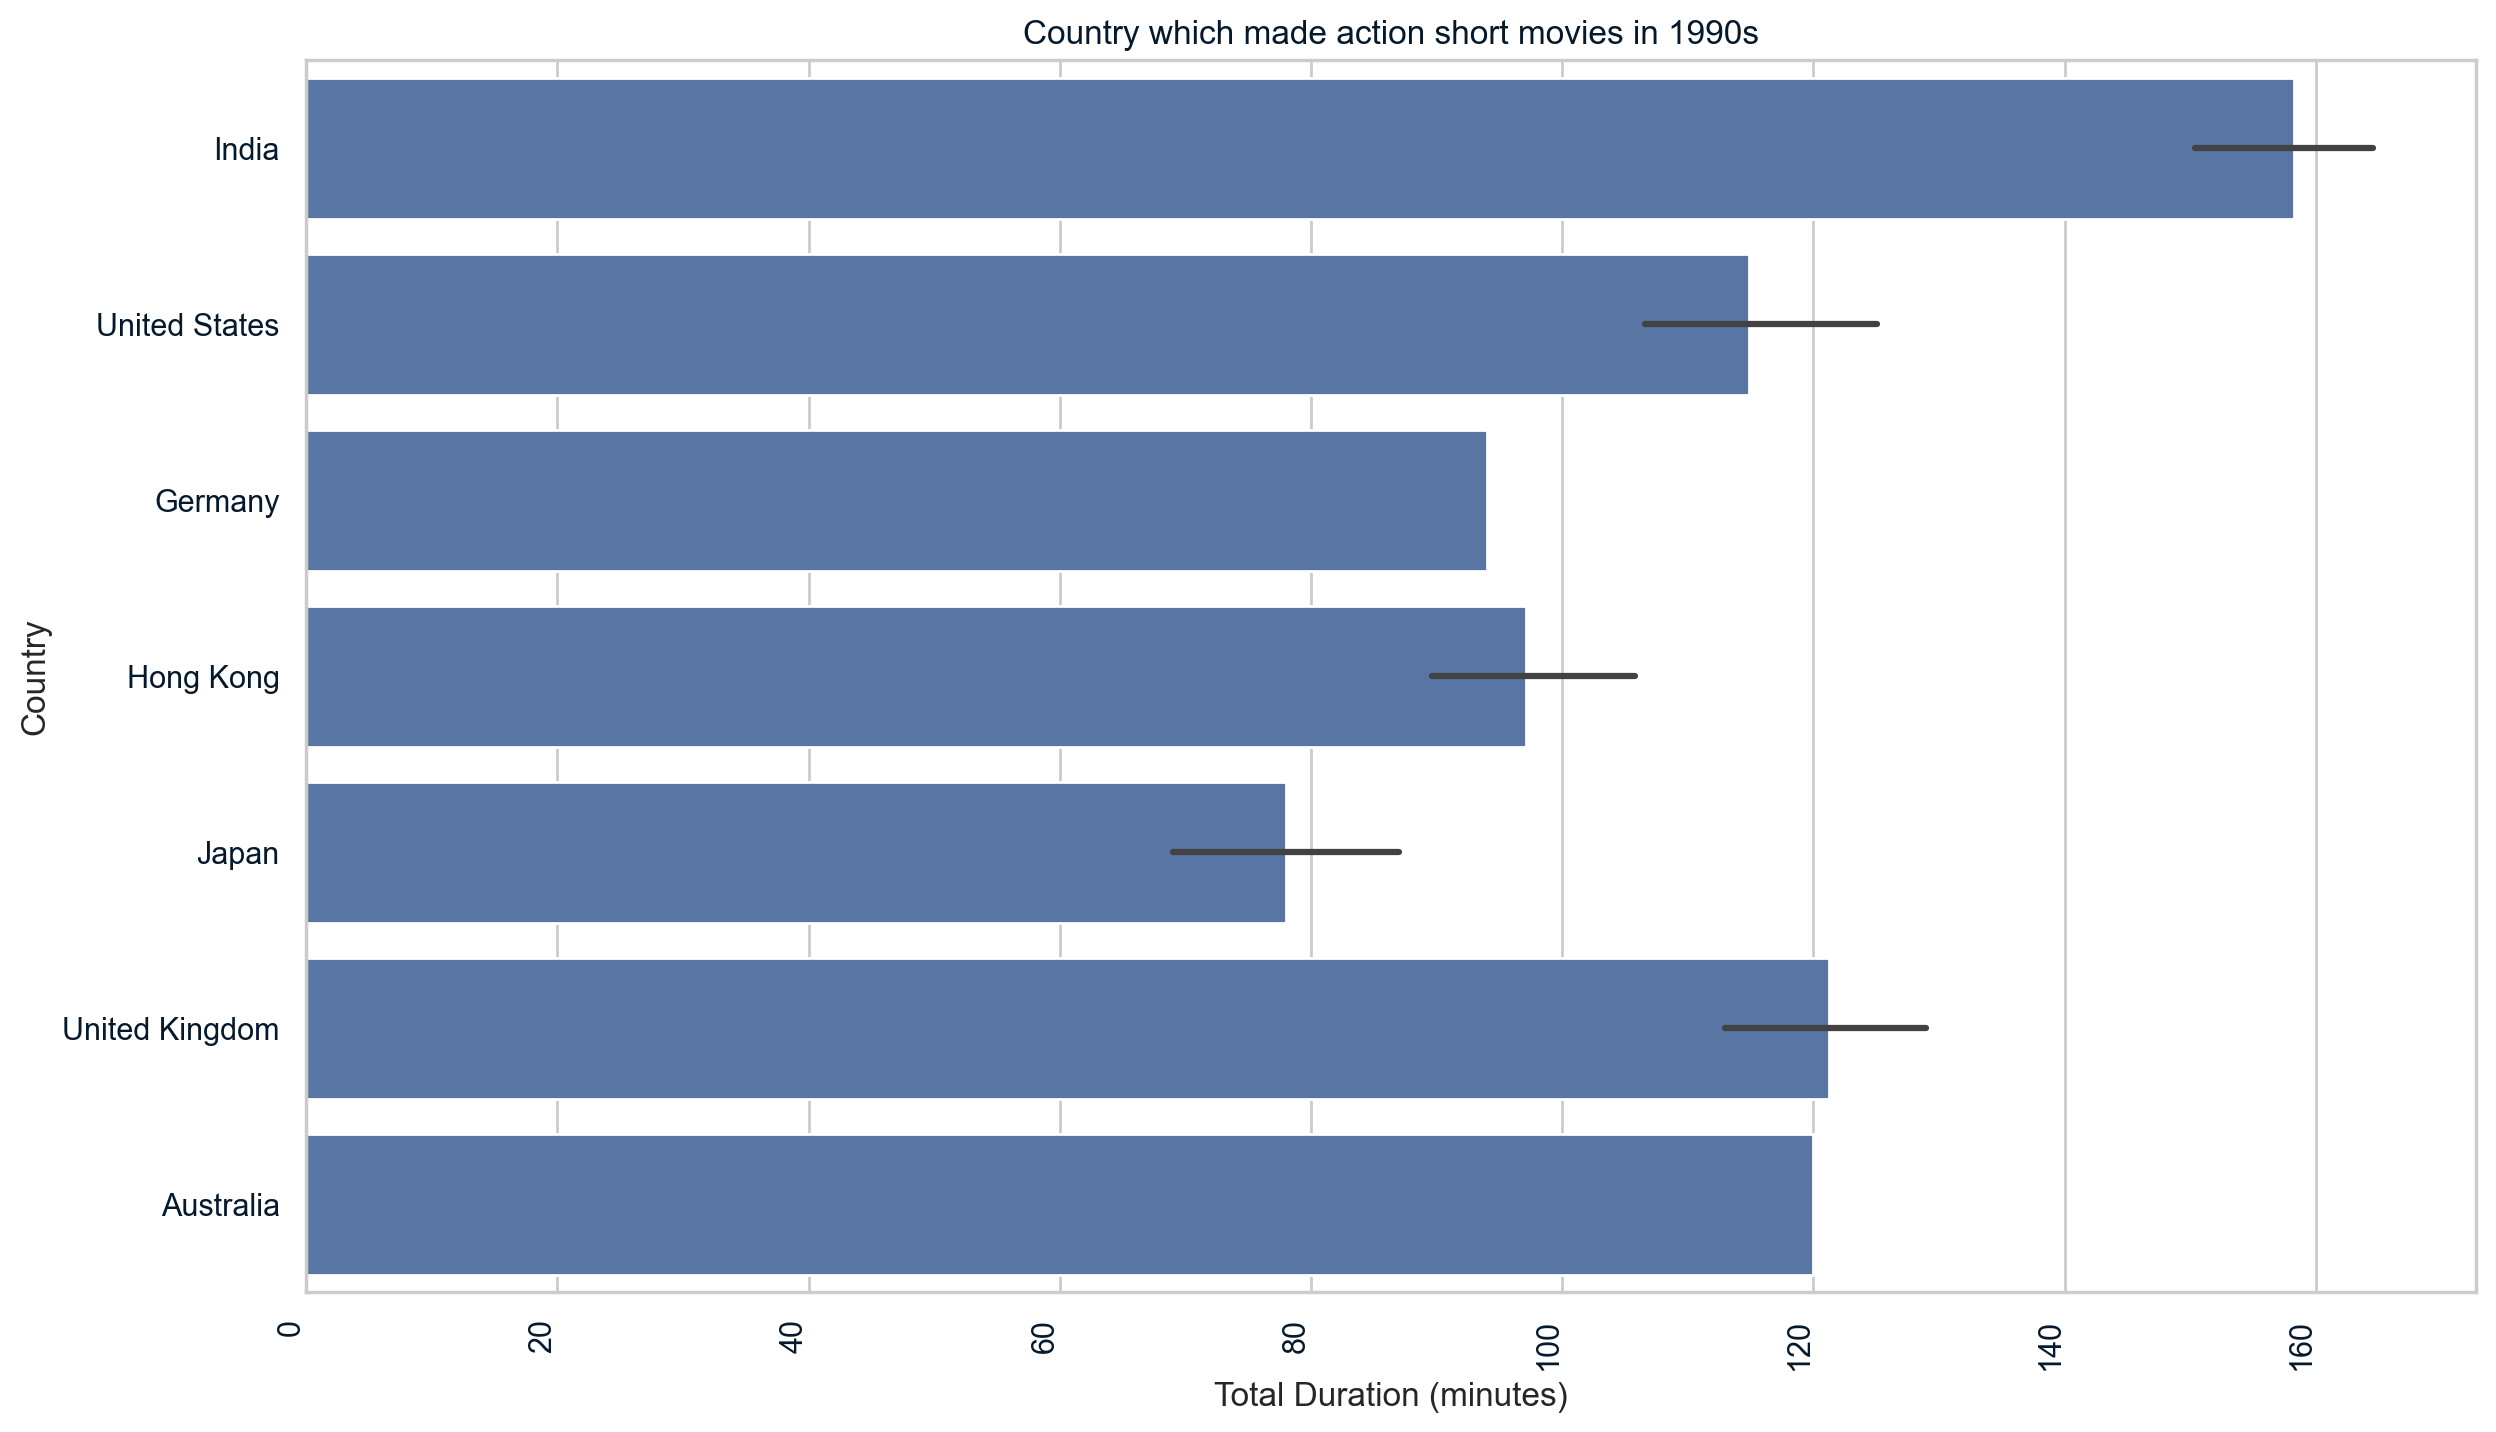

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a count plot with a different plot type for better visual appeal
plt.figure(figsize=(14, 8))  # Increase the figure size for better readability
sns.barplot(x='duration', y='country', data=action_movies_df)

# Add title and labels
plt.title('Country which made short action movies in 1990s')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Country')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=90, ha='right')  # Rotate labels and align them to the right

# Show the plot
plt.show()

In [39]:
# total no. of short action movies in 1990s
short_movie_count = short_movies['show_id'].count()
short_movie_count

7

### MOVIES VS TV SHOWS

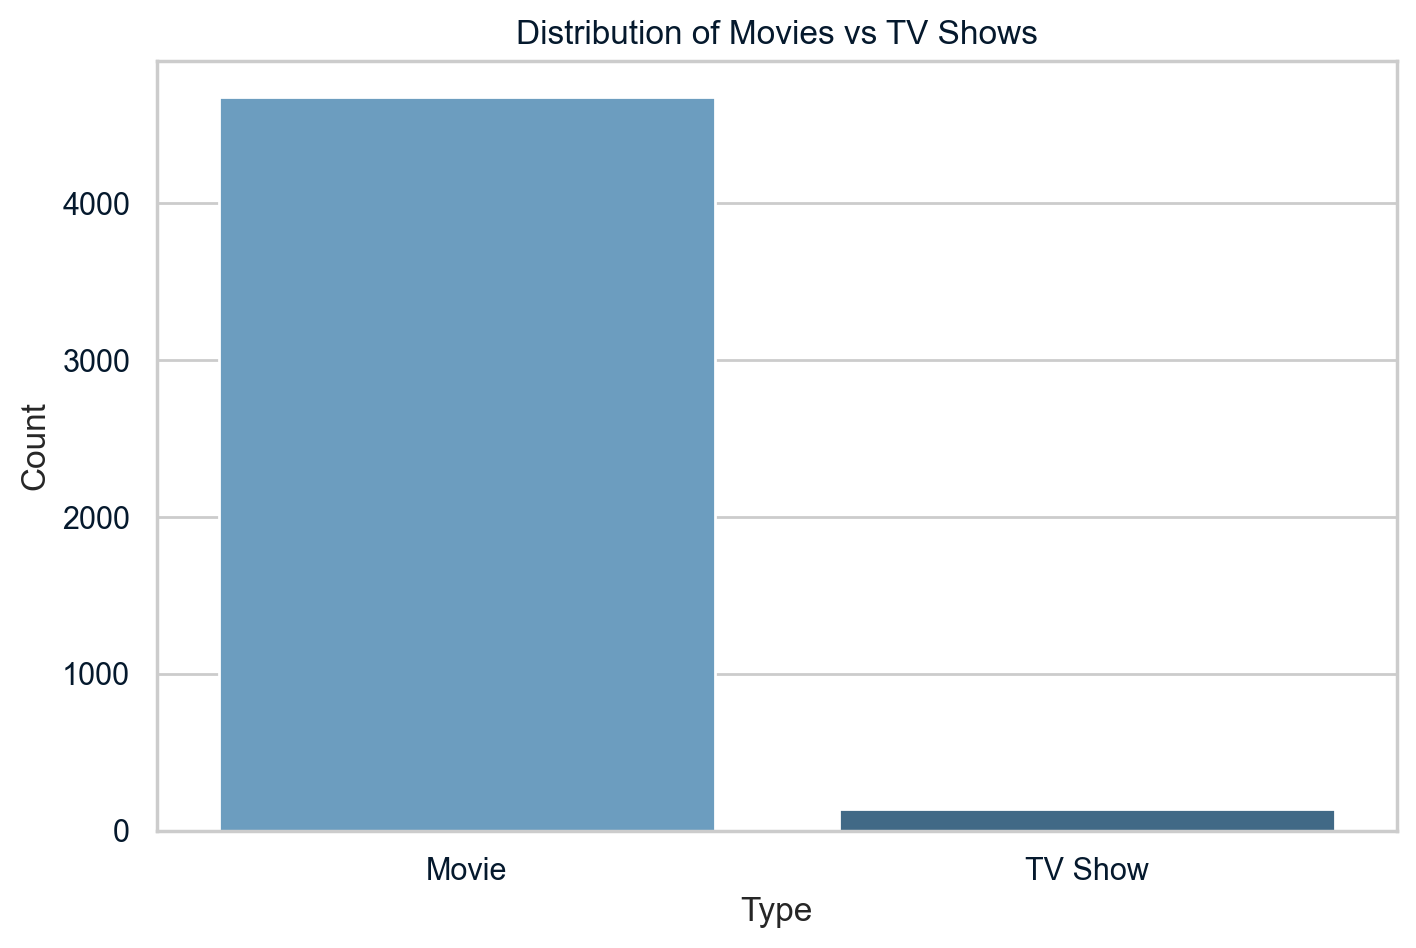

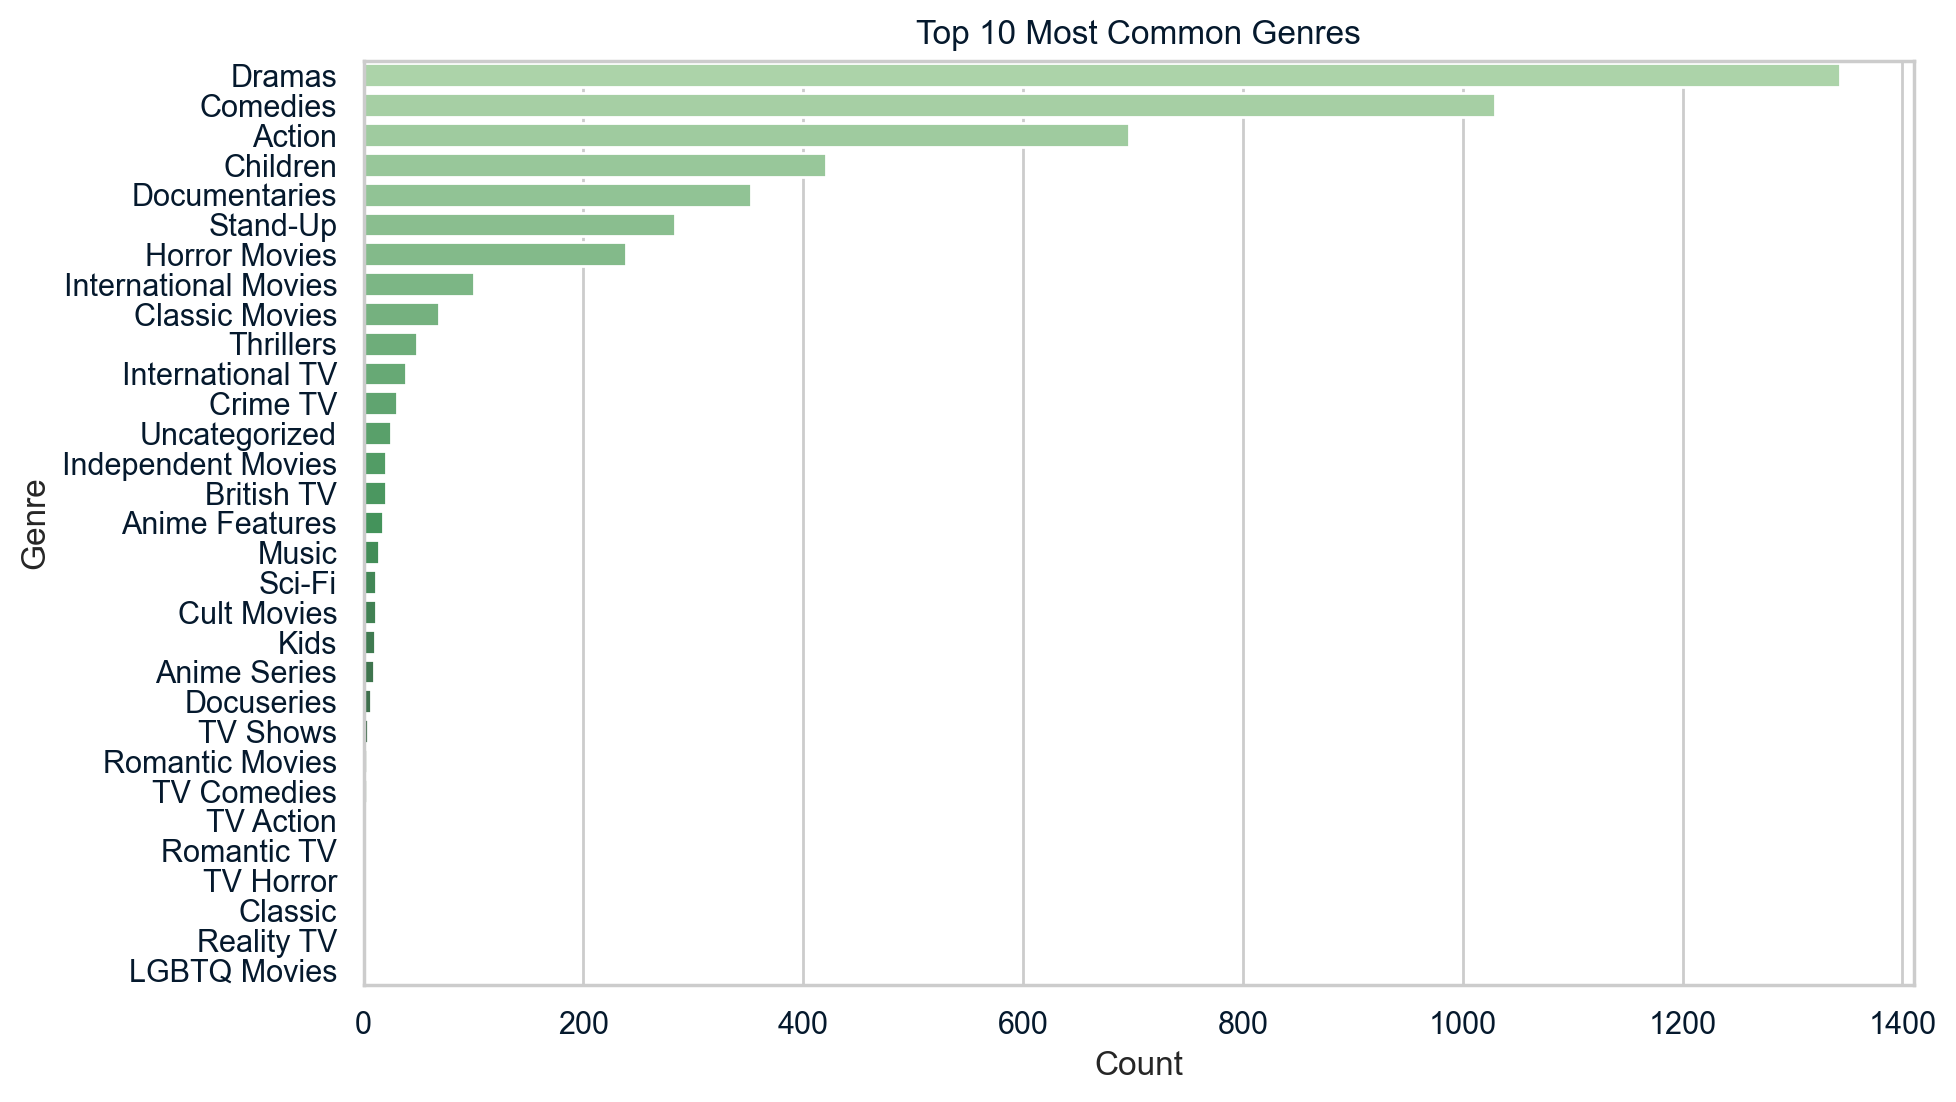

In [40]:
# Set style for the plots
sns.set(style="whitegrid")
type_distribution = netflix_df['type'].value_counts()


# 1. Plot for Movies vs TV Shows
plt.figure(figsize=(8, 5))
sns.barplot(x=type_distribution.index, y=type_distribution.values, palette="Blues_d")
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Plot for Top 10 Most Common Genres
genre_distribution = netflix_df['genre'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_distribution.values, y=genre_distribution.index, palette="Greens_d")
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


### TREND OF THE CONTENT PER YEAR

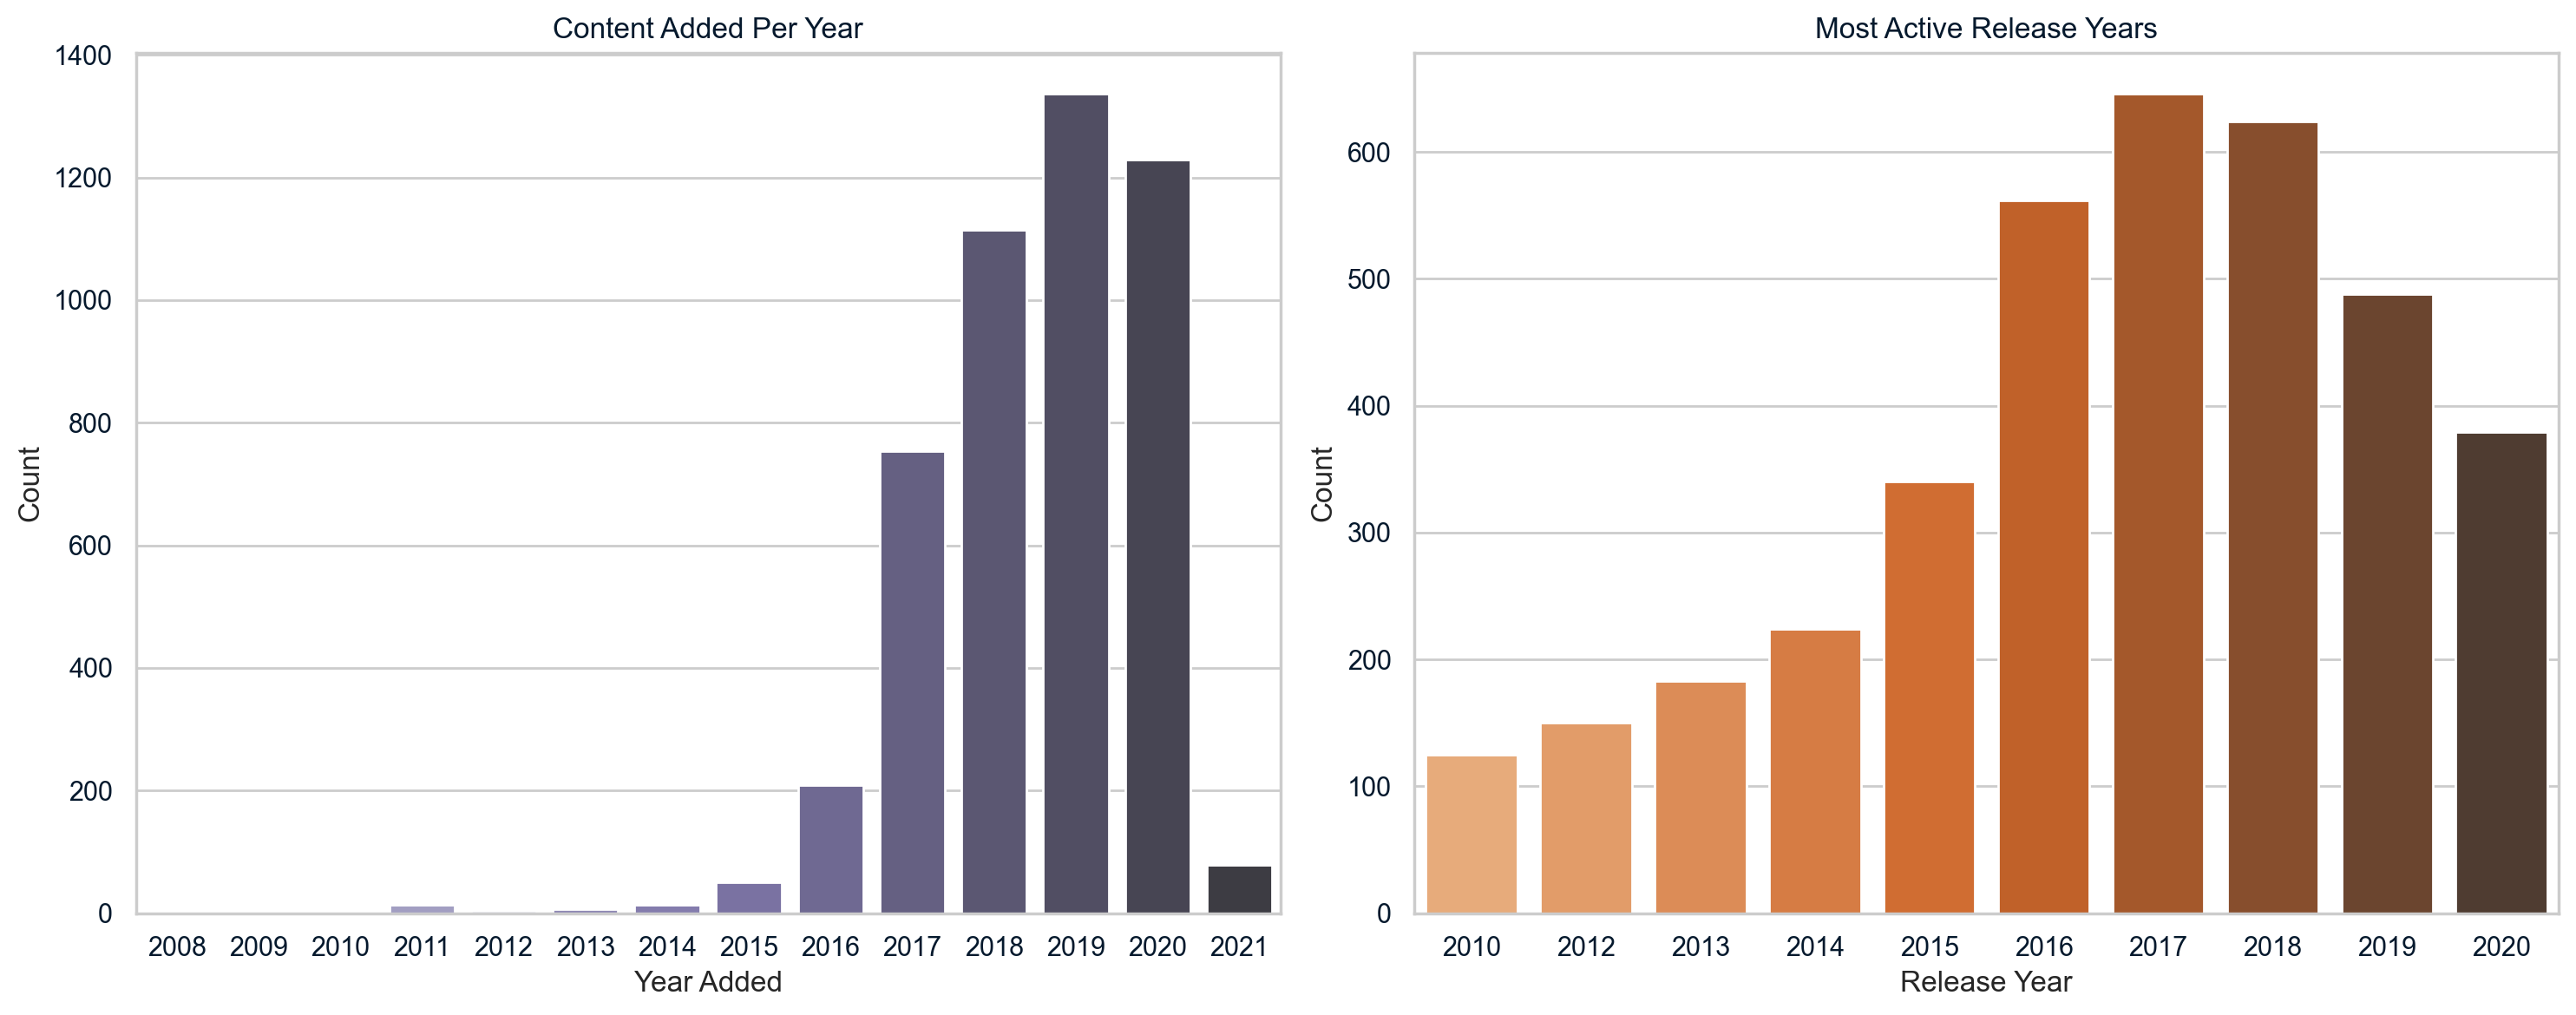

In [41]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year
content_added_per_year = netflix_df['year_added'].value_counts().sort_index()
content_added_per_year = netflix_df['year_added'].value_counts().sort_index()
most_active_release_years = netflix_df['release_year'].value_counts().head(10)
# Set style for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Plot for Content Added Per Year
sns.barplot(ax=axes[0], x=content_added_per_year.index, y=content_added_per_year.values, palette="Purples_d")
axes[0].set_title('Content Added Per Year')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Count')

# 2. Plot for Most Active Release Years
sns.barplot(ax=axes[1], x=most_active_release_years.index, y=most_active_release_years.values, palette="Oranges_d")
axes[1].set_title('Most Active Release Years')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

### TOP COUNTRIES PRODUCING MOST CONTENT

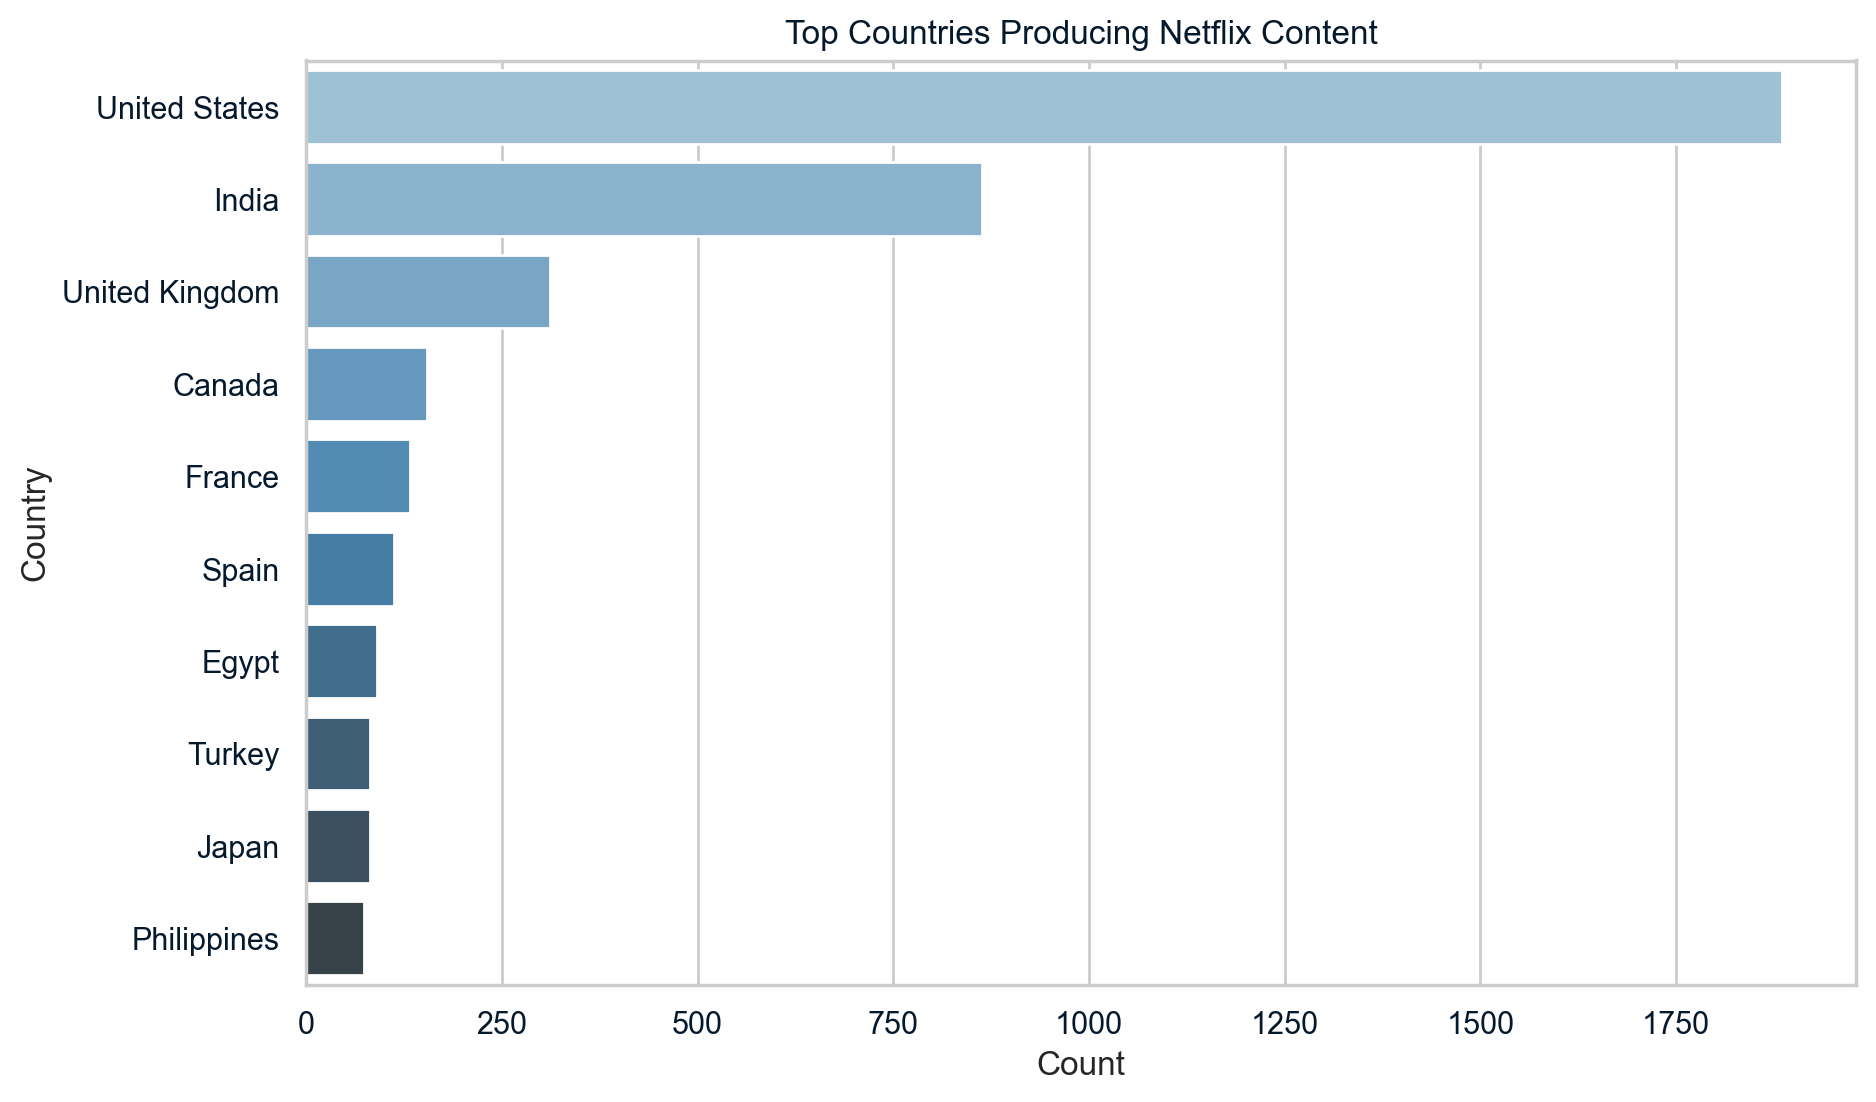

In [42]:
# Count the number of titles by country
top_countries = netflix_df['country'].value_counts().head(10)
# Set style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_d")
plt.title('Top Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


GENRE VS DURATION

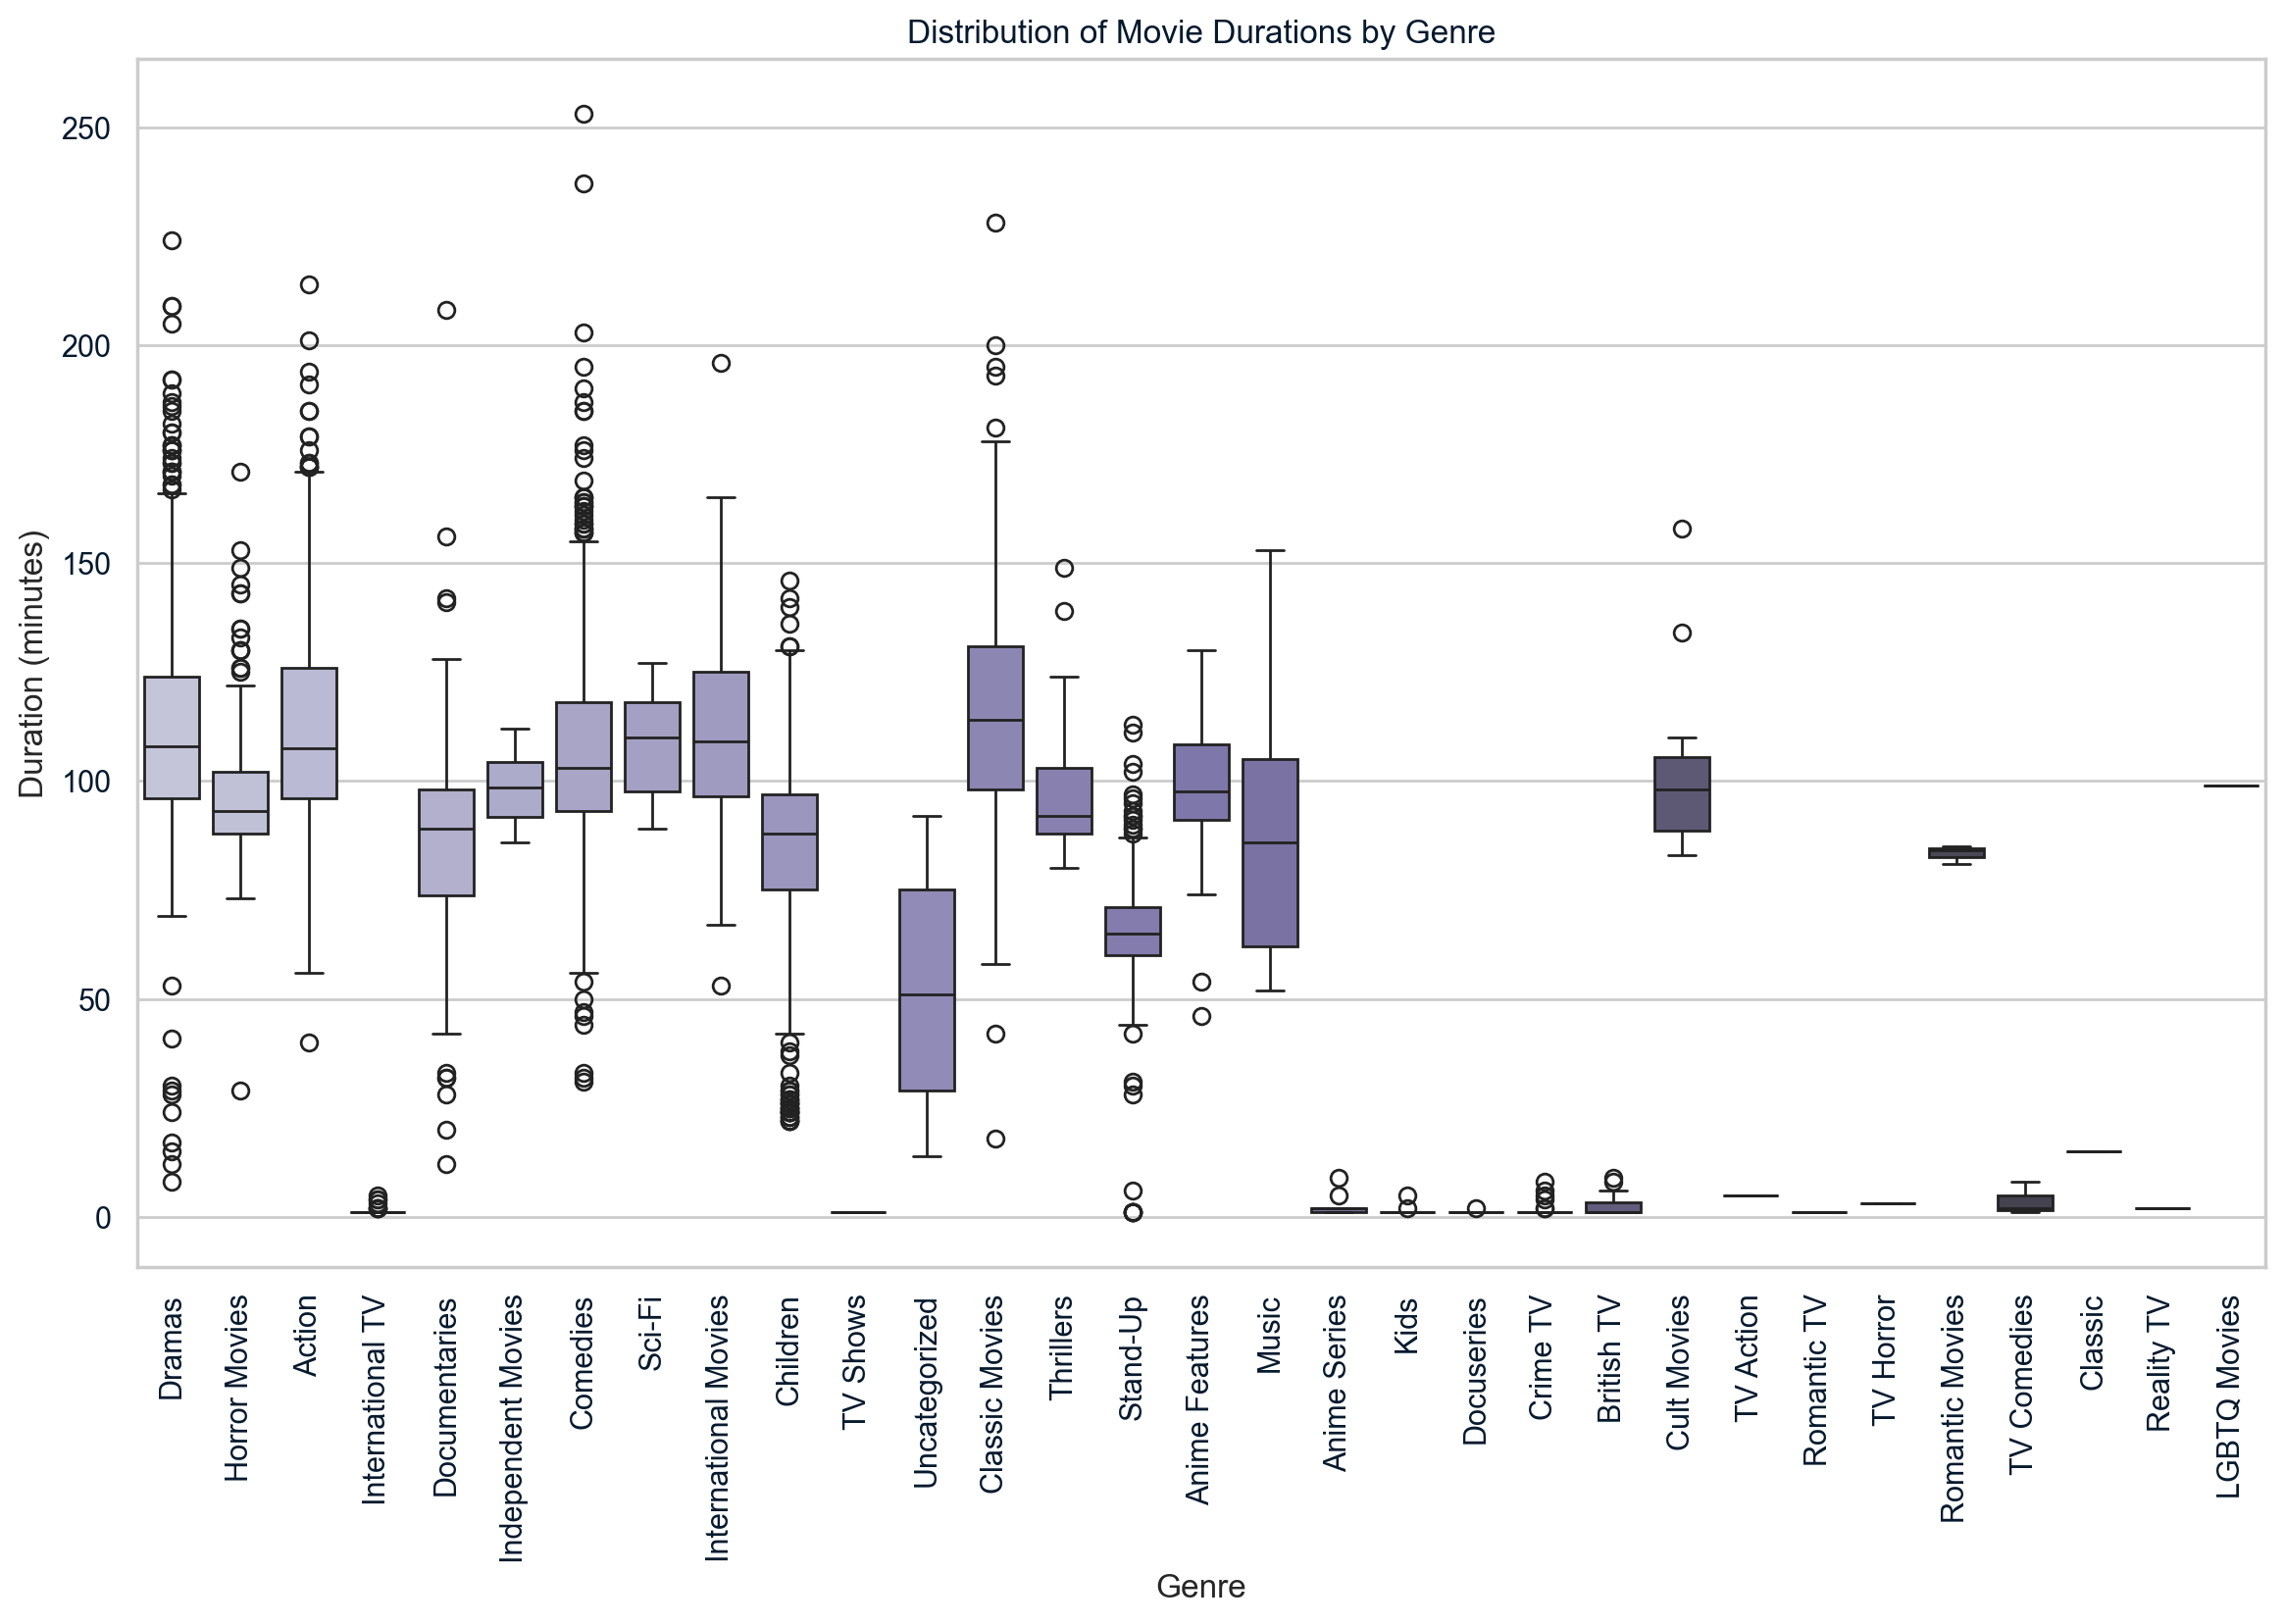

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='duration', data=netflix_df, palette="Purples_d")
plt.title('Distribution of Movie Durations by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)
plt.show()

### MOST FREQUNETLY FEATURED ACTORS

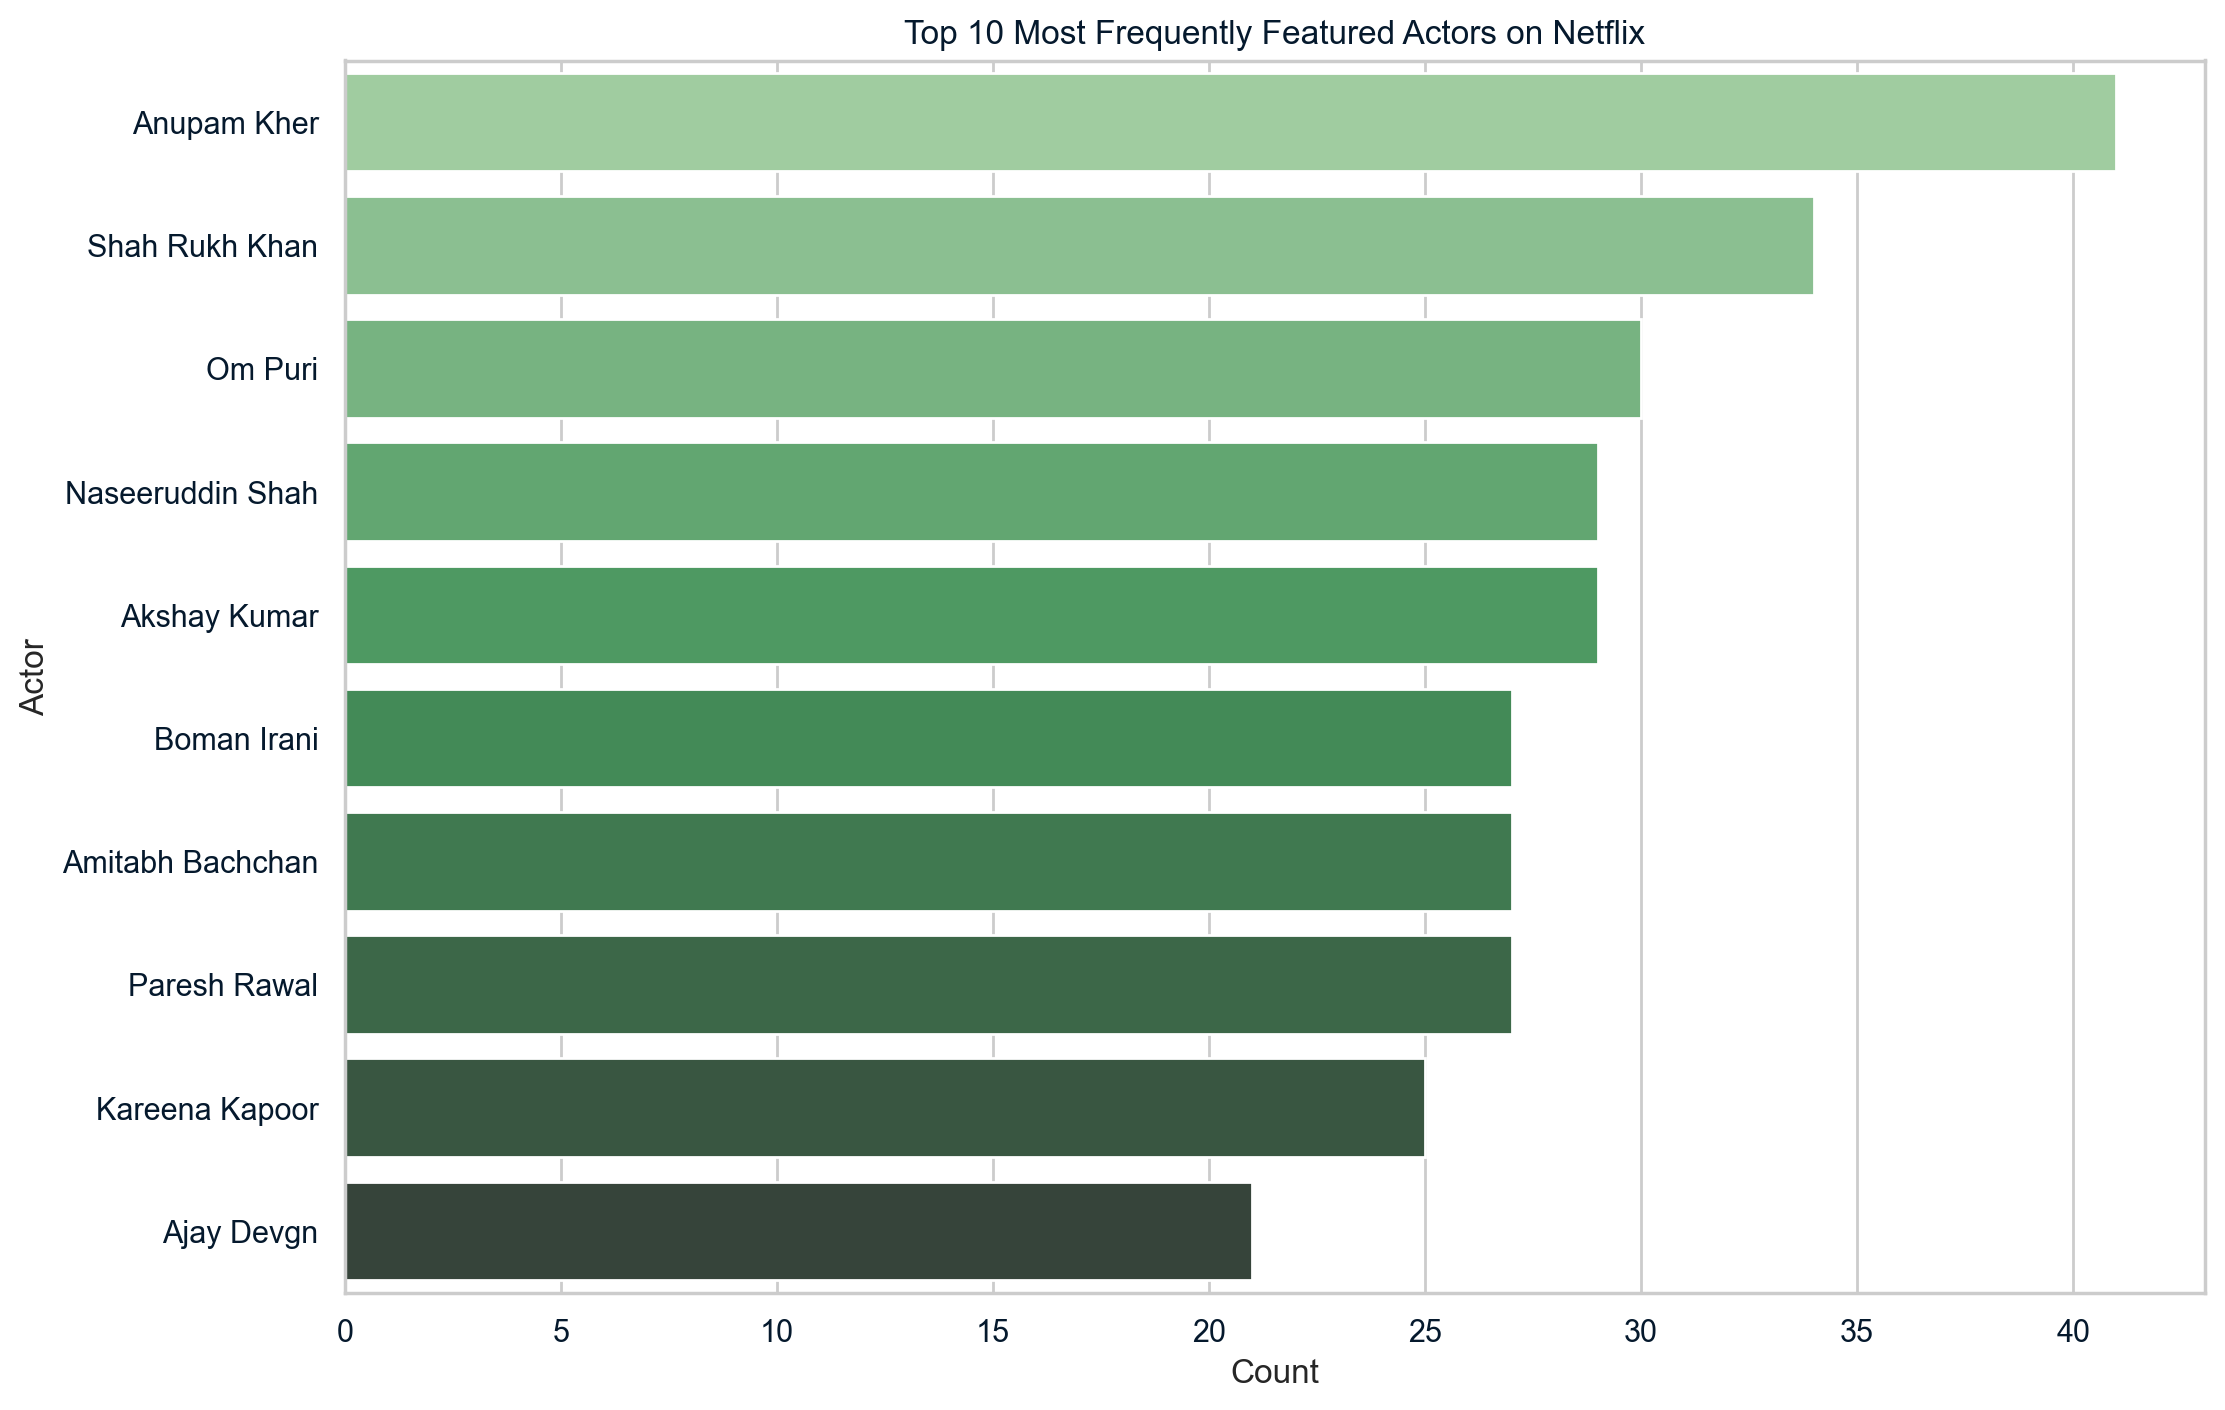

In [48]:
# Split the 'cast' column into individual actors and count their occurrences
from collections import Counter

# Drop rows where 'cast' is NaN
cast_series = netflix_df['cast'].dropna()

# Split the 'cast' column by comma and flatten the list
all_actors = [actor.strip() for sublist in cast_series.str.split(',') for actor in sublist]

# Count the occurrences of each actor
actor_counts = Counter(all_actors)

# Get the top 10 most frequently featured actors
top_actors = actor_counts.most_common(10)

# Convert to DataFrame for plotting
top_actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])

# Plot the top 10 most frequently featured actors
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Actor', data=top_actors_df, palette="Greens_d")
plt.title('Top 10 Most Frequently Featured Actors on Netflix')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()
